In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from ta import *

# Get All NASDAQ Symbols

In [3]:
symbols = get_nasdaq_symbols()
all_symbols=symbols["Security Name"]
print(all_symbols.shape)
all_symbols.head()

(8841,)


Symbol
A       Agilent Technologies, Inc. Common Stock
AA              Alcoa Corporation Common Stock 
AAAU               Perth Mint Physical Gold ETF
AABA                 Altaba Inc. - Common Stock
AAC             AAC Holdings, Inc. Common Stock
Name: Security Name, dtype: object

# Read in data

In [4]:
data={}  # Save all raw data in this dict
missing=[] # Save a list of missing stock tickers
for stock_ticker in all_symbols.index[:20]:    # Only read in 20 entries for development purpose
    try:
        data[stock_ticker]=web.DataReader(stock_ticker, 'yahoo',start="2010-01-04")
        print(".", end ="") 
    except Exception as e:
        missing.append(stock_ticker)
        print(stock_ticker)
        continue

....................

In [5]:
len(data)

20

In [31]:
df=data["AAPL"].copy()
df["Close"]=df["Adj Close"]
df.drop(columns=["Adj Close"],inplace=True)
df.dropna(inplace=True)
df = add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume", fillna=False)

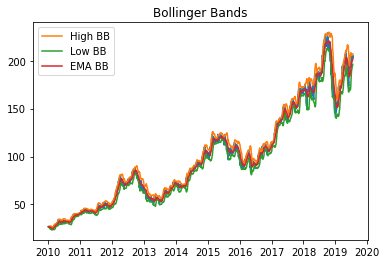

In [33]:
#Aroon
df["AU"]=aroon_up(df["Close"], n=25, fillna=False)
df["AD"]=aroon_down(df["Close"], n=25, fillna=False)
#DPO
df["DPO"]=dpo(df["Close"], n=20, fillna=False)
#MACD
df["MACD"]=macd_signal(df["Close"], n_fast=12, n_slow=26, n_sign=9)
#RSI
df["RSI"]=rsi(df["Close"],14)
# Add bollinger band high/low indicator filling NaN values
df['bb_high_indicator'] = bollinger_hband_indicator(df["Open"], n=20, ndev=2, fillna=False)
df['bb_low_indicator'] = bollinger_lband_indicator(df["Open"], n=20, ndev=2, fillna=False)
plt.plot(df.Close)
plt.plot(df.volatility_bbh, label='High BB')
plt.plot(df.volatility_bbl, label='Low BB')
plt.plot(df.volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [34]:
df

,High,Low,Open,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,others_dr,others_dlr,others_cr,AU,AD,DPO,MACD,RSI,bb_high_indicator,bb_low_indicator
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,30.642857,30.340000,30.490000,26.782711,123432400.0,-3.862628e+09,NaN,-24.491586,NaN,NaN,...,-72.794979,NaN,0.000000,4.0,4.0,71.664966,NaN,NaN,0.0,0.0
2010-01-05,30.798571,30.464285,30.657143,26.829010,150476200.0,-6.446315e+09,1.504762e+08,-23.534546,NaN,3.110113e-10,...,0.172869,0.172720,0.172869,8.0,4.0,71.641816,NaN,NaN,0.0,0.0
2010-01-06,30.747143,30.107143,30.625713,26.402260,138040000.0,-5.159495e+09,1.243620e+07,-19.863037,-5.557479e+06,-3.180602e-10,...,-1.590630,-1.603416,-1.420510,8.0,12.0,71.776350,NaN,NaN,0.0,0.0
2010-01-07,30.285715,29.864286,30.250000,26.353460,119282800.0,-3.842954e+09,-1.068466e+08,-19.368713,1.483401e+07,-6.267489e-10,...,-0.184831,-0.185002,-1.602716,8.0,16.0,71.855816,NaN,NaN,0.0,0.0
2010-01-08,30.285715,29.865715,30.042856,26.528664,111902700.0,-3.996835e+09,5.056100e+06,-18.937552,-3.303854e+06,-4.693915e-10,...,0.664821,0.662621,-0.948550,8.0,16.0,71.868456,NaN,NaN,0.0,0.0
2010-01-11,30.428572,29.778572,30.400000,26.294640,115557400.0,-3.244426e+09,-1.105013e+08,-17.838206,2.191307e+05,-3.441748e-10,...,-0.882155,-0.886069,-1.822338,8.0,24.0,71.915886,NaN,NaN,0.0,0.0
2010-01-12,29.967142,29.488571,29.884285,25.995537,148614900.0,-3.672371e+09,-2.591162e+08,-17.471227,-1.957226e+07,-4.884592e-10,...,-1.137505,-1.144024,-2.939113,8.0,28.0,71.992494,NaN,NaN,0.0,0.0
2010-01-13,30.132856,29.157143,29.695715,26.362217,151473000.0,-3.337321e+09,-1.076432e+08,-15.934401,2.427082e+06,-4.949257e-10,...,1.410550,1.400695,-1.570021,8.0,28.0,72.004114,NaN,NaN,0.0,0.0
2010-01-14,30.065714,29.860001,30.015715,26.209538,108223500.0,-4.968421e+09,-2.158667e+08,-17.840724,-8.643788e+06,-3.575362e-10,...,-0.579160,-0.580844,-2.140088,8.0,28.0,72.030117,NaN,NaN,0.0,0.0
